In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [32]:
df = pd.read_csv('Admission_Predict.csv')

In [33]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4,4.5,4.5,9.65,1.0,0.92
1,2,324.0,107.0,4,4.0,4.5,8.87,1.0,0.76
2,3,316.0,104.0,3,3.0,3.5,8.00,1.0,0.72
3,4,322.0,110.0,3,3.5,2.5,8.67,1.0,0.80
4,5,314.0,103.0,2,2.0,3.0,8.21,0.0,0.65


In [34]:
df['Admitted'] = [1 if x > 0.75 else 0 for x in df['Chance of Admit ']]

In [35]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Admitted
count,500.000000,494.000000,499.000000,500.000000,499.000000,496.000000,499.000000,496.000000,500.00000,500.000000
mean,250.500000,316.317814,107.192385,3.114000,3.372745,3.476815,8.576192,0.562500,0.72174,0.420000
std,144.481833,11.230853,6.087965,1.143512,0.991601,0.924398,0.605394,0.496579,0.14114,0.494053
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.34000,0.000000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.125000,0.000000,0.63000,0.000000
50%,250.500000,316.500000,107.000000,3.000000,3.500000,3.500000,8.560000,1.000000,0.72000,0.000000
75%,375.250000,324.000000,112.000000,4.000000,4.000000,4.000000,9.040000,1.000000,0.82000,1.000000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.97000,1.000000


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          494 non-null    float64
 2   TOEFL Score        499 non-null    float64
 3   University Rating  500 non-null    int64  
 4   SOP                499 non-null    float64
 5   LOR                496 non-null    float64
 6   CGPA               499 non-null    float64
 7   Research           496 non-null    float64
 8   Chance of Admit    500 non-null    float64
 9   Admitted           500 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 39.2 KB


In [37]:
df.rename({'Chance of Admit ': 'Chance of Admit', 'LOR ':'LOR'}, inplace=True)

In [38]:
df.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Admitted
0,1,337.0,118.0,4,4.5,4.5,9.65,1.0,0.92,1
1,2,324.0,107.0,4,4.0,4.5,8.87,1.0,0.76,1
2,3,316.0,104.0,3,3.0,3.5,8.00,1.0,0.72,0
3,4,322.0,110.0,3,3.5,2.5,8.67,1.0,0.80,1
4,5,314.0,103.0,2,2.0,3.0,8.21,0.0,0.65,0
5,6,330.0,115.0,5,4.5,3.0,9.34,1.0,0.90,1
6,7,321.0,109.0,3,3.0,4.0,8.20,1.0,0.75,0
7,8,308.0,101.0,2,3.0,4.0,7.90,0.0,0.68,0
8,9,302.0,102.0,1,2.0,1.5,8.00,0.0,0.50,0
9,10,323.0,108.0,3,3.5,3.0,8.60,0.0,0.45,0


In [39]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Admitted
0,1,337.0,118.0,4,4.5,4.5,9.65,1.0,0.92,1
1,2,324.0,107.0,4,4.0,4.5,8.87,1.0,0.76,1
2,3,316.0,104.0,3,3.0,3.5,8.00,1.0,0.72,0
3,4,322.0,110.0,3,3.5,2.5,8.67,1.0,0.80,1
4,5,314.0,103.0,2,2.0,3.0,8.21,0.0,0.65,0


Text(0.5, 1.0, 'Correlation Factors Heat Map')

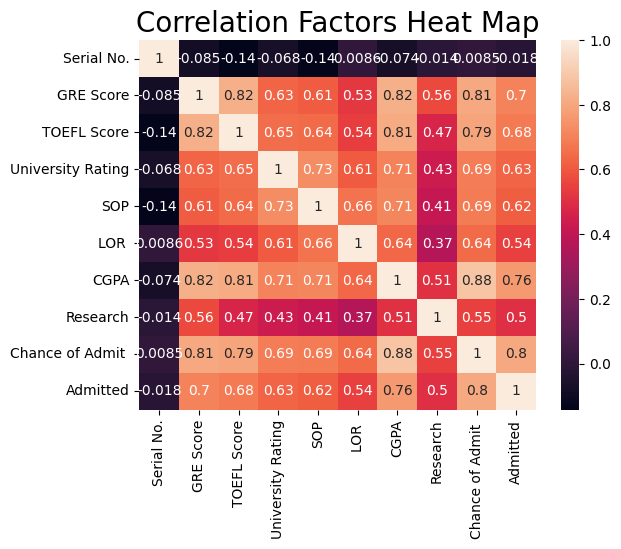

In [40]:
sns.heatmap(df.corr(), annot=True).set_title('Correlation Factors Heat Map', color='black', size='20')

In [41]:
GRE = pd.DataFrame(df['GRE Score'])
GRE.describe()

,GRE Score
count,494.000000
mean,316.317814
std,11.230853
min,290.000000
25%,308.000000
50%,316.500000
75%,324.000000
max,340.000000


C:\Users\hp\AppData\Local\Temp\ipykernel_7244\85772698.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(GRE).set_title('Probability Distribution for GRE Test Scores', size='20')


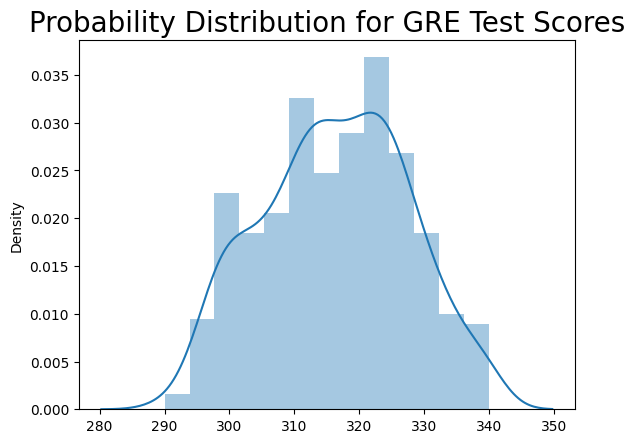

In [42]:
sns.distplot(GRE).set_title('Probability Distribution for GRE Test Scores', size='20')
plt.show()

In [43]:
CGPA = pd.DataFrame(df['CGPA'], columns=['CGPA'])
CGPA.describe()

,CGPA
count,499.000000
mean,8.576192
std,0.605394
min,6.800000
25%,8.125000
50%,8.560000
75%,9.040000
max,9.920000


C:\Users\hp\AppData\Local\Temp\ipykernel_7244\2706099085.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(CGPA).set_title('Probability Distribution Plot for CGPA', size='20')


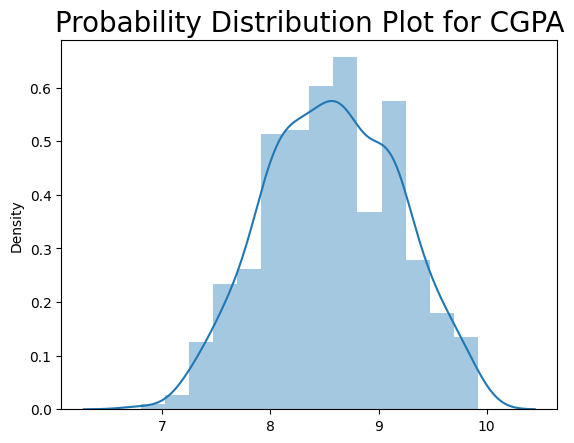

In [44]:
sns.distplot(CGPA).set_title('Probability Distribution Plot for CGPA', size='20')
plt.show()

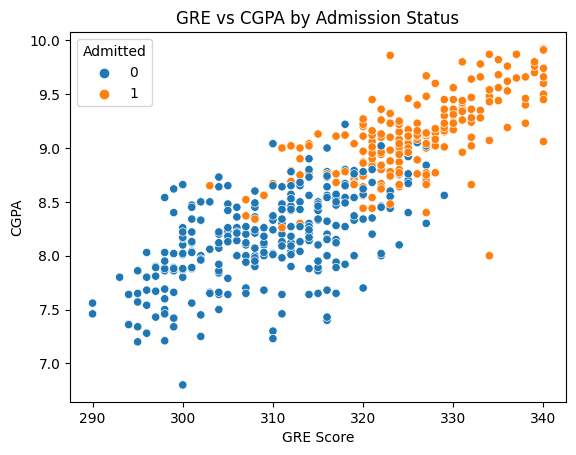

In [45]:
sns.scatterplot(x='GRE Score', y='CGPA', hue='Admitted', data=df)
plt.title('GRE vs CGPA by Admission Status')
plt.show()

In [46]:
df.isnull().sum()

Serial No.           0
GRE Score            6
TOEFL Score          1
University Rating    0
SOP                  1
LOR                  4
CGPA                 1
Research             4
Chance of Admit      0
Admitted             0
dtype: int64

In [47]:
df_clean = df[['GRE Score', 'CGPA', 'Admitted']].dropna()

In [48]:
X = df_clean[['GRE Score', 'CGPA']]  
y = df_clean['Admitted']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
print(X_train.isnull().sum())

GRE Score    0
CGPA         0
dtype: int64


In [51]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [52]:
y_pred = lr.predict(X_test)

In [53]:
pd.DataFrame({"Actual": y_test, "Predict": y_test}).head()

,Actual,Predict
461,0,0
80,0,0
317,0,0
182,0,0
339,1,1


In [54]:
y_pred_binary = [1 if p > 0.5 else 0 for p in y_pred]

In [55]:
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred_binary))

Confusion Matrix:
[[52  7]
 [ 3 37]]


In [56]:
print("Classification Report:")
print(classification_report(y_test, y_pred_binary))

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.88      0.91        59
           1       0.84      0.93      0.88        40

    accuracy                           0.90        99
   macro avg       0.89      0.90      0.90        99
weighted avg       0.90      0.90      0.90        99



In [57]:
print("Accuracy:", accuracy_score(y_test, y_pred_binary))

Accuracy: 0.898989898989899
